# Домашнее задание по теме  
## «Градиентный бустинг»

Импорт библиотек

In [1]:
# Импорт библиотек
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score, roc_auc_score, roc_curve
                             )

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Задача 1 Классификация

In [2]:
# Загрузка данных
# Использую обработанные данные из задачи классификация SVM
archive_path = 'input_data/input_data.zip'
with zipfile.ZipFile(archive_path, 'r') as archive:
 
    with archive.open('train_class.csv') as file:
        df_class = pd.read_csv(file)
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height_cm            38984 non-null  int64  
 2   weight_kg            38984 non-null  int64  
 3   waist_cm             38984 non-null  float64
 4   eyesight_left        38984 non-null  float64
 5   eyesight_right       38984 non-null  float64
 6   hearing_left         38984 non-null  int64  
 7   hearing_right        38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting_blood_sugar  38984 non-null  int64  
 11  cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  hdl                  38984 non-null  int64  
 14  ldl                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [3]:
# Разделение данных на обучающую и тестовую выборки
X = df_class.drop('smoking', axis=1)  # Признаки
y = df_class['smoking']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Инициализация модели
model = GradientBoostingClassifier(random_state=42)

# Сетка гиперпараметров для поиска
param_grid = {
    'n_estimators': [50, 100, 200],  # Количество деревьев
    'learning_rate': [0.01, 0.1, 0.2],  # Скорость обучения
    'max_depth': [3, 5, 7]  # Максимальная глубина деревьев
}

# Поиск лучших гиперпараметров
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print("Лучшие гиперпараметры:", best_params)

Лучшие гиперпараметры: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [5]:
# Инициализация модели с лучшими параметрами
best_model = GradientBoostingClassifier(**best_params, random_state=42)

# Обучение модели
best_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=200, random_state=42)

In [6]:
# Предсказание на тестовой и тренировочной выборках
y_pred_test = best_model.predict(X_test)
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]  # Вероятности для тестовых данных

y_pred_train = best_model.predict(X_train)
y_pred_proba_train = best_model.predict_proba(X_train)[:, 1]  # Вероятности для тренировочных данных

# Оценка качества модели на тестовых данных
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

# Оценка качества модели на тренировочных данных
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)

# Вывод метрик для тестовых данных
print("Метрики для тестовых данных:")
print("Confusion Matrix:")
print(conf_matrix_test)
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"ROC-AUC: {roc_auc_test:.4f}")

# Вывод метрик для тренировочных данных
print("\nМетрики для тренировочных данных:")
print("Confusion Matrix:")
print(conf_matrix_train)
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")
print(f"ROC-AUC: {roc_auc_train:.4f}")

Метрики для тестовых данных:
Confusion Matrix:
[[6045 1367]
 [1265 3019]]
Accuracy: 0.7750
Precision: 0.6883
Recall: 0.7047
F1 Score: 0.6964
ROC-AUC: 0.8535

Метрики для тренировочных данных:
Confusion Matrix:
[[16210  1044]
 [ 1133  8901]]
Accuracy: 0.9202
Precision: 0.8950
Recall: 0.8871
F1 Score: 0.8910
ROC-AUC: 0.9728


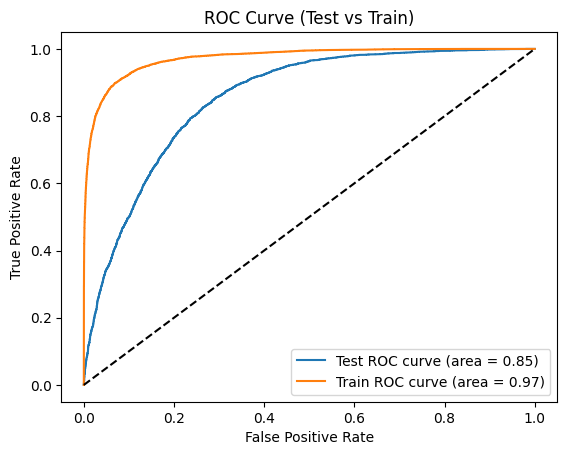

In [7]:
# Вычисление ROC-кривых для тестовых и тренировочных данных
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)

# Построение графиков
plt.figure()
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot(fpr_train, tpr_train, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Линия случайного классификатора
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test vs Train)')
plt.legend(loc="lower right")
plt.show()

Вывод:
- Гиперпараметры подобраны с помощью GridSearchCV. Лучшие гиперпараметры: 'learning_rate' = 0.1, 'max_depth' = 7, 'n_estimators' = 200
- Модель показывает хорошие результаты на тестовых данных (ROC-AUC = 0.8534), но есть признаки переобучения, так как метрики на тренировочных данных значительно лучше.

## Задача 2. Регрессия

In [8]:
# Загрузка данных
# Использую обработанные данные из задачи регрессия SVM 
archive_path = 'input_data/input_data.zip'
with zipfile.ZipFile(archive_path, 'r') as archive:
 
    with archive.open('train_regr.csv') as file:
        df_regr = pd.read_csv(file)
df_regr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11520 entries, 0 to 11519
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   11520 non-null  float64
 1   annual_income         11520 non-null  float64
 2   number_of_dependents  11520 non-null  float64
 3   health_score          11520 non-null  float64
 4   previous_claims       11520 non-null  float64
 5   vehicle_age           11520 non-null  float64
 6   credit_score          11520 non-null  float64
 7   insurance_duration    11520 non-null  float64
 8   premium_amount        11520 non-null  float64
 9   gender_Male           11520 non-null  int64  
 10  smoking_status_Yes    11520 non-null  int64  
 11  location_Suburban     11520 non-null  int64  
 12  location_Urban        11520 non-null  int64  
 13  gender_Male.1         11520 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 1.2 MB


In [9]:
# Загрузка данных
X = df_regr.drop('premium_amount', axis=1)  # Признаки
y = df_regr['premium_amount']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Подбор гиперпараметров
# Инициализация модели
model = GradientBoostingRegressor(random_state=42)

# Сетка гиперпараметров для поиска
param_grid = {
    'n_estimators': [220],  # Количество деревьев (подобран несколькими тестами)
    'learning_rate': [0.01, 0.1, 0.2],  # Скорость обучения
    'max_depth': [3, 5, 7],  # Максимальная глубина деревьев
    'min_samples_split': [2],  # Минимальное количество samples для разделения (подобран тенесколькими тестами)
    'min_samples_leaf': [4, 5, 6]  # Минимальное количество samples в листе
}

# Поиск лучших гиперпараметров
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
# Лучшие параметры
best_params = grid_search.best_params_
print("Лучшие гиперпараметры:", best_params)

Лучшие гиперпараметры: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 220}


In [17]:
# Инициализация модели с лучшими параметрами
best_model = GradientBoostingRegressor(**best_params, random_state=42)

# Обучение модели
best_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, min_samples_leaf=4,
                          n_estimators=220, random_state=42)

In [18]:
# Предсказание на тестовой выборке
y_pred = best_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")

MAE: 616.31
MSE: 604303.42
R^2: 0.03


Выводы:
- Гиперпараметры: 'learning_rate' = 0.01, 'max_depth' = 7, 'min_samples_leaf' = 4, 'min_samples_split' = 2, 'n_estimators' = 220. Подобраны несколькими тестированиями с помощью GridSearchCV.
MSE (Mean Squared Error) = 604303,42 Высокое значение MSE указывает на то, что модель делает большие ошибки в предсказаниях. По сравнению с RF (607364.06) небольшое снижение.
- MAE (Mean Absolute Error) = 616.31 Высокое значение MAE подтверждает, что модель ошибается в предсказаниях.
- R² (Коэффициент детерминации) = 0.03 Значение R² близко к 0, что означает, что модель практически не объясняет целевую переменную.
- R² немного лучше ранее обученных моделей (максимальный был у RF = 0.02), но попрежнему очень низок.
- Модель работает не лучше, чем простое предсказание среднего значения.